<a href="https://colab.research.google.com/github/pabloclaero/Prediccion-Videojuegos/blob/main/Proyecto_2_Pablo_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Parte 1

In [ ]:
import numpy as np

In [1]:
import pandas as pd
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Visualize los datos

1) Fuente de datos:

https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

2) Breve descripción de datos:

Esta base de datos contiene información sobre las ventas de videojuegos en todo el mundo. La base de datos incluye 16 características, como el género del juego, la plataforma, la editora y la puntuación de los críticos.

3) ¿Cuál es el objetivo?:

El objetivo es predecir las ventas globales de un juego en función de las características dadas.

4) ¿Este es un problema de clasificación o regresión?:

Es un problema de regresión, porque objetivo es predecir las ventas globales de un juego en función a sus características. 

5) ¿Cuántas características hay?:

In [ ]:
filas, columnas = df.shape
print('En este conjunto de datos hay', columnas, 'caracteristicas que serian:')
print('Name:            Nombre del videojuego')
print('Platform:        Plataforma para la cual fue creado')
print('Year_of_Release: Año de lanzamiento')
print('Genre:           Genero del videojuego')
print('Publisher:       Empresa desarroladora')
print('NA_Sales:        Ventas')
print('EU_Sales:        Ventas en Estados Unidos')
print('JP_Sales:        Ventas en Japon')
print('Other_Sales:     Otras Ventas')
print('Global_Sales:    Ventas Globales')
print('Critic_Score:    Puntaje de Critcas')
print('Critic_Count:    Nùmero de Criticas')
print('User_Score:      Puntaje segun el Usuario')
print('User_Count:      Numero de Usuarios que dejaron su critica')
print('Developer:       Responsable de la creación del juego')
print('Rating:          Las calificaciones de la ESRB')

En este conjunto de datos hay 16 caracteristicas que serian:
Name:            Nombre del videojuego
Platform:        Plataforma para la cual fue creado
Year_of_Release: Año de lanzamiento
Genre:           Genero del videojuego
Publisher:       Empresa desarroladora
NA_Sales:        Ventas
EU_Sales:        Ventas en Estados Unidos
JP_Sales:        Ventas en Japon
Other_Sales:     Otras Ventas
Global_Sales:    Ventas Globales
Critic_Score:    Puntaje de Critcas
Critic_Count:    Nùmero de Criticas
User_Score:      Puntaje segun el Usuario
User_Count:      Numero de Usuarios que dejaron su critica
Developer:       Responsable de la creación del juego
Rating:          Las calificaciones de la ESRB


In [ ]:
#Imprimi Las columnas que habia y que datos contenian

6) ¿Cuántas filas de datos hay?

In [ ]:
print('Hay', filas, 'filas y', columnas, 'columnas')

Hay 16719 filas y 16 columnas


In [ ]:
#Imprimi cuantas filas y columnas hay

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
#Busque datos faltantes

Uno de los retos mas dificiles que puedo ver es como lidio con los datos faltantes

##Parte 2

-Elimine las columnas innecesarias

In [ ]:
df = df.drop(["User_Count", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Critic_Count"], axis=1)

In [ ]:
#Con ested codigo elimine las columnas que considere innecesarias

-Elimine las filas duplicadas

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Busque Si hay duplicados

-Identifique y aborde los valores faltantes 

In [ ]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
Global_Sales          0
Critic_Score       8582
User_Score         6704
Developer          6623
Rating             6769
dtype: int64

In [ ]:
#Busque si hay faltantes

In [ ]:
moda_score_1 = df['Name'].mode()[0]
df['Name'].fillna(moda_score_1, inplace=True)
moda_score_2 = df['Genre'].mode()[0]
df['Genre'].fillna(moda_score_2, inplace=True)
df = df.drop(["Critic_Score", "Developer", "Rating"], axis=1)
median_score_1 = df['Year_of_Release'].median()
df['Year_of_Release'].fillna(median_score_1, inplace=True)
moda_score = df['Publisher'].mode()[0]
df['Publisher'].fillna(moda_score, inplace=True)

In [ ]:
df['User_Score'].replace('tbd', np.nan, inplace=True)
median_score = df['User_Score'].median()
df['User_Score'].fillna(median_score, inplace=True)

In [ ]:
#Maneje los datos faltantes

In [ ]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
User_Score         0
dtype: int64

In [ ]:
#Busque si quedaban datos faltantes

-Identificar y Corregir las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)

In [ ]:
pd.set_option('display.max_rows', None)
df['Name'].value_counts().sort_index()

 Beyblade Burst                                                                                                                          1
 Fire Emblem Fates                                                                                                                       1
 Frozen: Olaf's Quest                                                                                                                    2
 Haikyu!! Cross Team Match!                                                                                                              1
 Tales of Xillia 2                                                                                                                       1
'98 Koshien                                                                                                                              1
.hack//G.U. Vol.1//Rebirth                                                                                                               1
.hack//G.U. Vol.2//Reminisc

In [ ]:
#Utilice un codigo para poder ver todas las filas de la columna Name

In [ ]:
mapping = {"uDraw Studio":
           "uDraw Studio","Daigasso! Band Brothers P":
           "Daigasso! Band Brothers", "Crash Team Racing":
           "Crash Tag Team Racing", "101-in-1 Explosive Megamix":
           "101-in-1 Explosive Sports Party Megamix Wii", "101-in-1 Party Megamix Wii":
           "101-in-1 Explosive Sports Party Megamix Wii", "101-in-1 Sports Megamix":
           "101-in-1 Explosive Sports Party Megamix Wii", "101-in-1 Sports Party Megamix":
           "101-in-1 Explosive Sports Party Megamix Wii", "100 Classic Games":
           "100 Classic", "100 All-Time Favorites":
           "100 Classic", "100 Classic Books":
           "100 Classic", "Ace Combat: Assault Horizon":
           "Ace Combat: Joint Assault Horizon Legacy", "Ace Combat: Assault Horizon Legacy":
           "Ace Combat: Joint Assault Horizon Legacy", "Ace Combat: Joint Assault":
           "Ace Combat: Joint Assault Horizon Legacy", "Adidas Power Soccer":
           "Adidas Power Soccer 98", "Adventure":
           "Adventure Island", "Adventure Time: The Secret of the Nameless":
           "Adventure Time: The Secret of the Nameless Kingdom", "Agatha Christie's The ABC Murders":
           "Agatha Christie: The ABC Murders", "Are You Smarter than a 5th Grader? Make the Grade":
           "Are You Smarter than a 5th Grader?", "Are You Smarter than a 5th Grader? Game Time":
           "Are You Smarter than a 5th Grader?", "Are You Smarter Than a 5th Grader? Back to School":
           "Are You Smarter than a 5th Grader?", "Armored Core 2":
           "Armored Core 2: Another Age", "Counter-Strike: Source":
           "Counter-Strike", "Gadget Racers (PAL)":
           "Gadget Racers", "Gal*Gun":
           "Gal Gun", "Gran Turismo 5 Prologue":
           "Gran Turismo 5", "Gran Turismo 4 Prologue":
           "Gran Turismo 4", "Grand Theft Auto: Vice City Stories":
           "Grand Theft Auto: Vice City", "Halo 2 Multiplayer Map Pack":
           "Halo 2"}
df["Name"] = df["Name"].replace(mapping)

In [ ]:
#Busque los datos que estaban mal escritos y busque en google si etsaban bien o mal para luego remplazarlos por los correctos
#en caso de ser necesario

####Datos mal escritos

-Busque un codigo para poder ver todas las filas

-Fui revisando Todas las filas de los nombres y a su vez fui indagando para ver si no eran diferentes para luego juntar los que estaban mal escritos y separados

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Revise datos duplicados en caso de que me haya equivocado

Producido visuales univariantes para el objetivo y todas las características

In [ ]:
df_new = df.copy()
df_new['Before_2005'] = (df_new['Year_of_Release'] < 2005).astype(int)

In [ ]:
#Cree un nuevo df para hacer unos graficos

In [3]:
import matplotlib.pyplot as plt

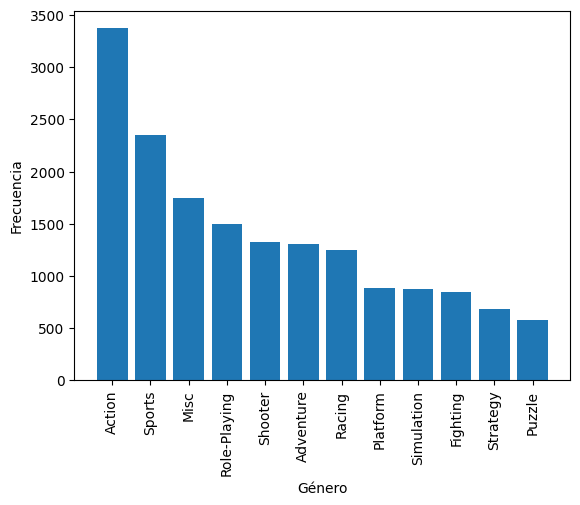

In [ ]:
counts = df["Genre"].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#Cree un grafico de la frecuencia de los generos de los videojuegos

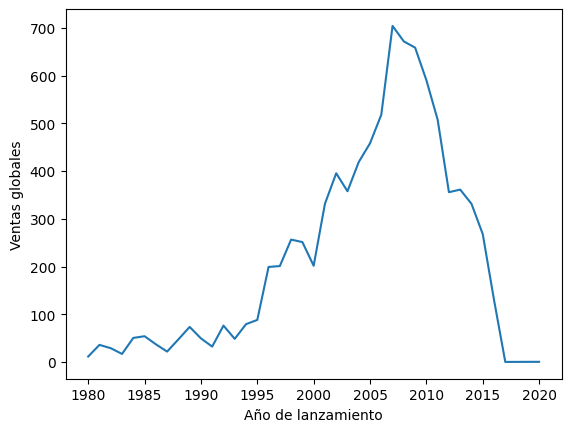

In [ ]:
df.groupby("Year_of_Release")["Global_Sales"].sum().plot()
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas globales")
plt.show()

In [ ]:
#Grafico para ver el incremento en ventas segun el año

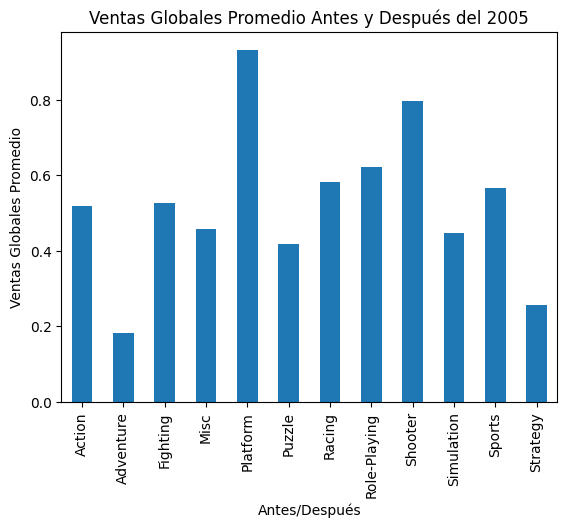

In [ ]:
sales_by_year_genre = df_new.groupby('Genre')['Global_Sales'].mean()
sales_by_year_genre.plot(kind='bar')
plt.title('Ventas Globales Promedio Antes y Después del 2005')
plt.xlabel('Antes/Después')
plt.ylabel('Ventas Globales Promedio')
plt.show()

In [ ]:
#Grafico de ventas segun el genero

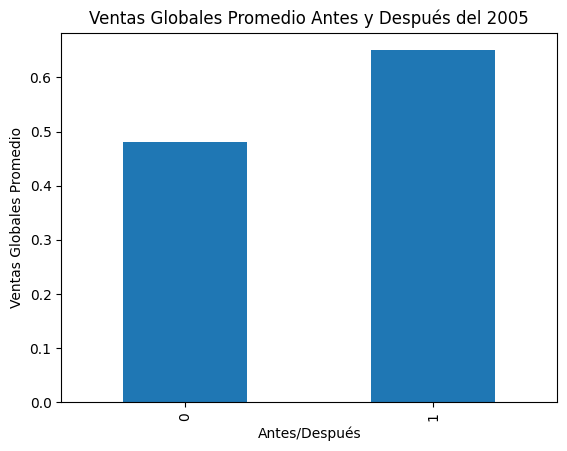

In [ ]:
sales_by_year = df_new.groupby('Before_2005')['Global_Sales'].mean()
sales_by_year.plot(kind='bar')
plt.title('Ventas Globales Promedio Antes y Después del 2005')
plt.xlabel('Antes/Después')
plt.ylabel('Ventas Globales Promedio')
plt.show()

In [ ]:
#Gtrafico de ventas antes y despues de 2005

Identificar los valores atípicos

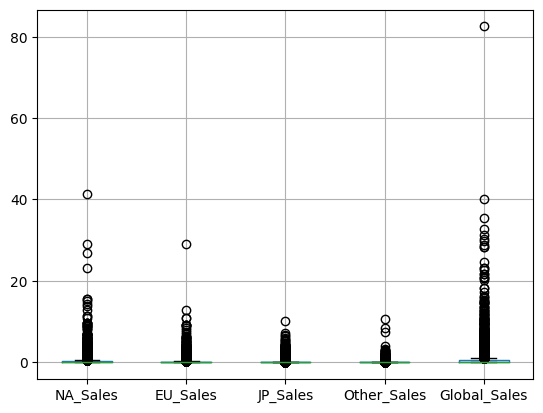

In [4]:
df.boxplot(column=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
plt.show()

In [ ]:
#Graficos de datos atipicos en ventas 

Mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

<ipython-input-5-9aecfdb4f19b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno')


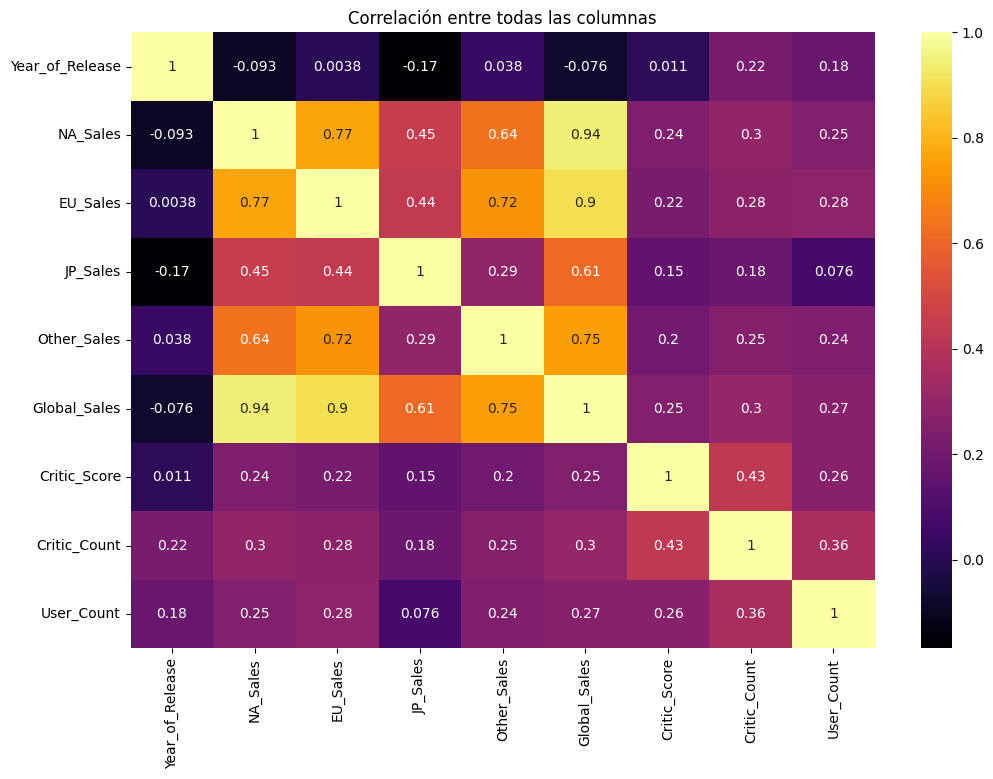

In [5]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='inferno')
plt.title('Correlación entre todas las columnas')
plt.show()

In [ ]:
#Grafico de calor antes de eliminar columnas con datos faltantes e innecesarias

Comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron

####Elimine las columnas: 

-User Count, Critics Count porque las considere innecesarais para el objetivo de precirlas ventas de los videojuegos.

-Na_Sales, EU_Sales, JP_Sales, Other_Sales porque Global sales es la suma de las antes mencionadas.

####Datos faltantes

-En las columnas Name, Gnere, Publisher rellene con el mayor numero de nombres

-En las filas User_Score, Year_of_Release lo rellene con la media a ambos

-Elimine las filas Critics_Score, Rating, Developer porque tenian bastantes valores faltantes y diferentes como para imputar esos datos faltantes

####Datos mal escritos

-Busque un codigo para poder ver todas las filas

-Fui revisando Todas las filas de los nombres y a su vez fui indagando para ver si no eran diferentes para luego juntar los que estaban mal escritos y separados

####Valores atipicos
-Se puede observar varios valores atipicos en ventas el que mas resalta es uno de mas de 80 pero es porque es la suma de ventas


In [ ]:
#Explicacion de lo hecho previamente

In [ ]:
print(df.dtypes)

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
Global_Sales       float64
User_Score          object
dtype: object


In [ ]:
#Busque el tipo de datos que tenian las columnas restantes

In [ ]:
df['User_Score'] = df['User_Score'].astype(float)

In [ ]:
#Corregi la columna User_Score que tenia mal el tipo de datos y hacia interferencia con los modelos

In [ ]:
name_dummies = pd.get_dummies(df['Platform'])
genre_dummies = pd.get_dummies(df['Genre'])
publisher_dummies = pd.get_dummies(df['Name'])
df = pd.concat([df, genre_dummies, name_dummies, publisher_dummies], axis=1)
df.drop(['Genre', 'Platform', 'Name'], axis=1, inplace=True)

In [ ]:
#Cree dummies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Importe algunas cosas necesarias para mi modelo

In [ ]:
X = df.drop(columns=['Global_Sales', 'Publisher'])
y = df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
#Dividi en x e hice un train test split

In [ ]:
from keras.layers import Dropout
model_1 = Sequential([
    Dense(1000, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(500, activation="relu"),
    Dropout(0.5),
    Dense(300, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid"),
])
model_1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history_1 = model_1.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)
y_pred_1 = model_1.predict(X_test)
accuracy_1 = np.mean(np.round(y_pred_1) == np.ravel(y_test))


Epoch 1/10
627/627 [==============================] - 133s 211ms/step - loss: 2.6566 - accuracy: 8.9722e-04 - val_loss: 0.6906 - val_accuracy: 0.0020
Epoch 2/10
627/627 [==============================] - 130s 207ms/step - loss: 0.6922 - accuracy: 0.0011 - val_loss: 0.6901 - val_accuracy: 0.0020
Epoch 3/10
627/627 [==============================] - 147s 235ms/step - loss: 0.6924 - accuracy: 0.0011 - val_loss: 0.6903 - val_accuracy: 0.0020
Epoch 4/10
627/627 [==============================] - 143s 228ms/step - loss: 0.6922 - accuracy: 0.0011 - val_loss: 0.6899 - val_accuracy: 0.0020
Epoch 5/10
627/627 [==============================] - 135s 215ms/step - loss: 0.6925 - accuracy: 0.0011 - val_loss: 0.6898 - val_accuracy: 0.0020
Epoch 6/10
627/627 [==============================] - 133s 212ms/step - loss: 0.6925 - accuracy: 0.0011 - val_loss: 0.6899 - val_accuracy: 0.0020
Epoch 7/10
627/627 [==============================] - 132s 211ms/step - loss: 0.6927 - accuracy: 0.0011 - val_loss: 0.69

In [ ]:
#Cree un modelo de red neuronal

In [ ]:
print('Presicion:', accuracy_1)

Presicion: 0.0007177033492822966


In [ ]:
#Imprimi la precision del modelo de redes neuronales

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
reg = LinearRegression()
reg.fit(X_train,y_train)
le = LabelEncoder()
y_test = le.fit_transform(y_test)
X_test = X_test.astype(float)
reg = LinearRegression()
reg.fit(X_test,y_test)
test_score_r = reg.score(X_test, y_test)
print("R2 score para regresión lineal en datos de prueba:", test_score_r)

R2 score para regresión lineal en datos de prueba: 0.951977109230282


In [ ]:
#Importe mas cosas necesarias para los modelos e hice un modelo de regresion lineal e imprimi su precision

In [ ]:
rf = Pipeline([
    ('pca', PCA(n_components=5)),
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42))
])
rf.fit(X_train, y_train)
print("R2 score para Random Forest en datos de prueba:", rf.score(X_test, y_test))

R2 score para Random Forest en datos de prueba: -0.4022576465790195


In [ ]:
#Realize un modelo de RandomForest e imprimi su precision

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train, y_train)
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.9998721379269631
-0.40843269317316744


In [ ]:
#Realize un modelo de DecisionTreeRegressor e imprimi su precicion

In [ ]:
max_depth_range = list(range(2, 30))
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

In [ ]:
#Codigo paara entrenear mejor mi modelo de DecisionTreeRegressor

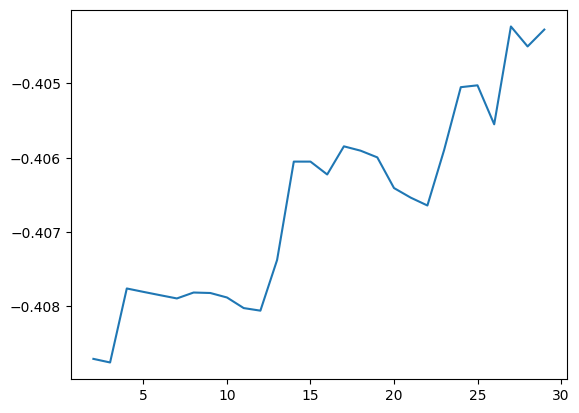

In [ ]:
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.show()

In [ ]:
#Grafico para ver y poder poder en mi modelo de DecisionTreeRegressor el max_depth

In [ ]:
dec_tree_9 = DecisionTreeRegressor(max_depth = 27, random_state = 50)
dec_tree_9.fit(X_train, y_train)
train_9_score = dec_tree_9.score(X_train, y_train)
test_9_score = dec_tree_9.score(X_test, y_test)
print("R^2 en conjunto de entrenamiento: ", train_9_score)
print("R^2 en conjunto de prueba: ", train_9_score)

R^2 en conjunto de entrenamiento:  0.6488362341359803
R^2 en conjunto de prueba:  0.6488362341359803


In [ ]:
#Cree modelo de DecisionTreeRegressor e imprimi la precicion de mi modelo 